In [1]:
#import the librearies
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
import yfinance as yf
#data = yf.download("AAPL", start="2017-01-01", end="2017-04-30")
#show the data
aapl=yf.Ticker('AAPL')
df=aapl.history(start="2010-01-01",  end="2023-02-03")
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-27 00:00:00-05:00,143.160004,147.229996,143.080002,145.929993,70492800,0.0,0.0
2023-01-30 00:00:00-05:00,144.960007,145.550003,142.850006,143.000000,64015300,0.0,0.0
2023-01-31 00:00:00-05:00,142.699997,144.339996,142.279999,144.289993,65874500,0.0,0.0
2023-02-01 00:00:00-05:00,143.970001,146.610001,141.320007,145.429993,77663600,0.0,0.0
2023-02-02 00:00:00-05:00,148.899994,151.179993,148.169998,150.820007,118339000,0.0,0.0


In [3]:
#start = pd.to_datetime(['2007-01-01']).astype(int)[0]//10**9 # convert to unix timestamp.
#end = pd.to_datetime(['2023-02-04']).astype(int)[0]//10**9 # convert to unix timestamp.
#stock_ticker='AAPL'
#url = 'https://query1.finance.yahoo.com/v7/finance/download/' + stock_ticker + '?period1=' + str(start) + '&period2=' + str(end) + '&interval=1d&events=history'
#df = pd.read_csv(url)
#df.tail()
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04 00:00:00-05:00,6.497556,6.530130,6.465590,6.515213,493729600,0.0,0.0
2010-01-05 00:00:00-05:00,6.533174,6.563313,6.492075,6.526476,601904800,0.0,0.0
2010-01-06 00:00:00-05:00,6.526475,6.552352,6.415965,6.422663,552160000,0.0,0.0
2010-01-07 00:00:00-05:00,6.446409,6.454020,6.364212,6.410790,477131200,0.0,0.0
2010-01-08 00:00:00-05:00,6.402266,6.454020,6.364517,6.453411,447610800,0.0,0.0
...,...,...,...,...,...,...,...
2023-01-27 00:00:00-05:00,143.160004,147.229996,143.080002,145.929993,70492800,0.0,0.0
2023-01-30 00:00:00-05:00,144.960007,145.550003,142.850006,143.000000,64015300,0.0,0.0
2023-01-31 00:00:00-05:00,142.699997,144.339996,142.279999,144.289993,65874500,0.0,0.0


In [4]:
#df.to_csv('aapl.csv',index=False)

In [5]:
#df=pd.read_csv("aapl.csv")
#df.tail()

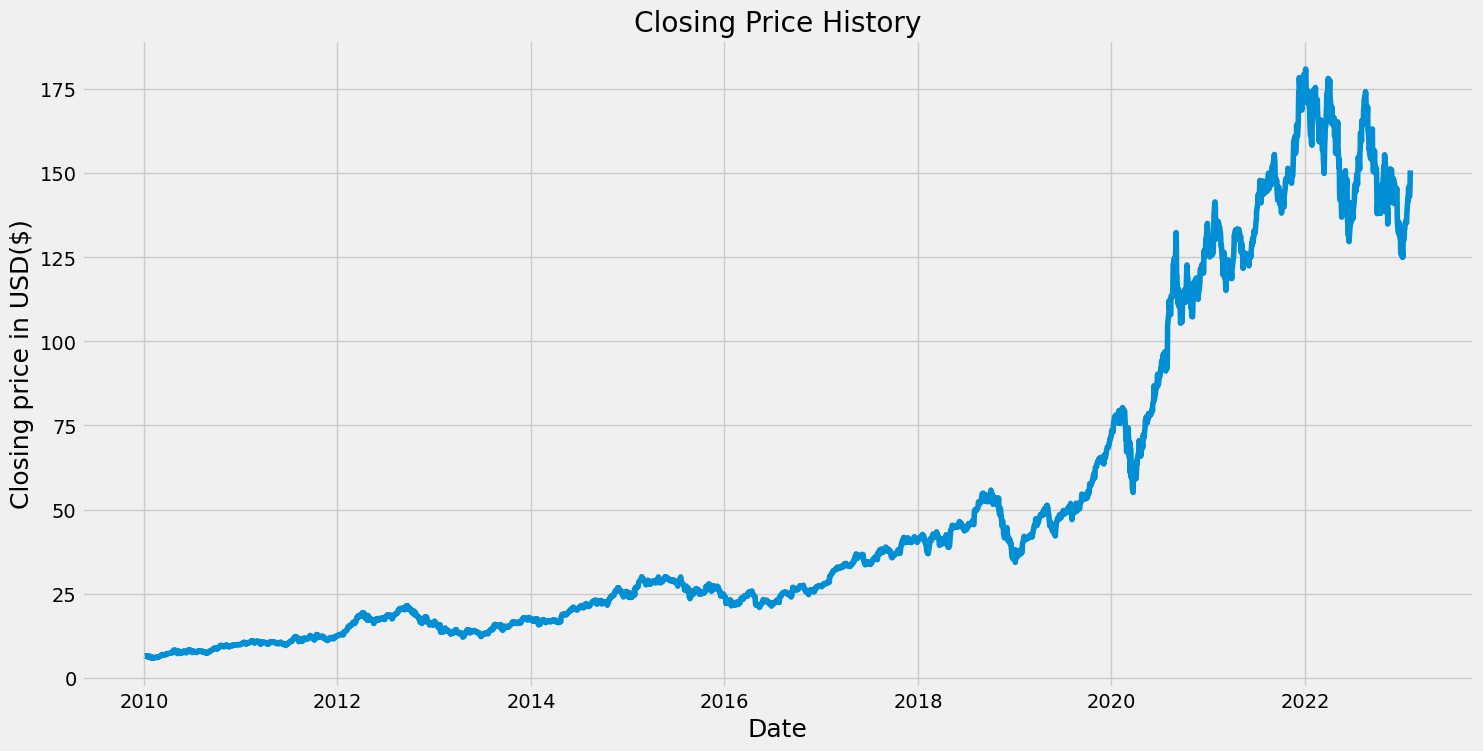

In [6]:
#visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closing price in USD($)',fontsize=18)
plt.show()

In [7]:
#create a new dataframe with only the close column
data=df.filter(['Close'])
#convert the dataframe to numpy array
dataset=data.values
#Get the number of rows to train the model on
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

2636

In [8]:
dataset

array([[  6.51521301],
       [  6.52647638],
       [  6.42266273],
       ...,
       [144.28999329],
       [145.42999268],
       [150.82000732]])

In [8]:
#Scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.00381776],
       [0.00388209],
       [0.00328925],
       ...,
       [0.79059392],
       [0.797104  ],
       [0.8278842 ]])

In [9]:
#Create the training dataset
#Create the scaled training dataset
train_data=scaled_data[0:training_data_len,:]
#Split the data into x_train and y_train data sets
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([3.81776212e-03, 3.88208540e-03, 3.28925300e-03, 3.22144425e-03,
       3.46483363e-03, 3.13974534e-03, 2.72423085e-03, 3.23361344e-03,
       3.02152251e-03, 2.41304905e-03, 3.99682549e-03, 3.42137960e-03,
       2.78507956e-03, 9.90960373e-04, 1.91583022e-03, 2.41478090e-03,
       2.75204927e-03, 1.25867453e-03, 1.73184362e-06, 4.65923116e-04,
       6.62364831e-04, 1.24824262e-03, 0.00000000e+00, 5.92826953e-04,
       3.59874925e-04, 7.19747127e-04, 5.33712813e-04, 1.15088905e-03,
       1.44816709e-03, 1.97320979e-03, 1.82542852e-03, 1.89148093e-03,
       1.67244084e-03, 1.45513531e-03, 8.70989357e-04, 1.49685749e-03,
       1.72981496e-03, 2.18529528e-03, 2.94503547e-03, 2.92069435e-03,
       3.00411966e-03, 3.24404535e-03, 4.67656866e-03, 4.69916432e-03,
       5.38413298e-03, 5.70056204e-03, 5.81529668e-03, 6.00653197e-03,
       5.52670237e-03, 5.63275329e-03, 5.57538733e-03, 5.66752086e-03,
       5.25028815e-03, 5.68490738e-03, 6.31250735e-03, 6.48809887e-03,
     

In [10]:
#convert the x_train and y_train to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

In [11]:
#Reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2576, 60, 1)

In [12]:
#Build the LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [13]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [14]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

2576/2576 [==============================] - 150s 57ms/step - loss: 2.1824e-04


In [15]:
#Create the testing data set
#Create a new array containing scaled values from index 2101 to 2701
test_data=scaled_data[training_data_len-60:,:]
#Create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [16]:
#Convert the data to a numpy array
x_test=np.array(x_test)

In [17]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [18]:
#Get the model's predicted price value
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

21/21 [==============================] - 2s 29ms/step


In [19]:
y_test

array([[ 88.6342392 ],
       [ 89.81091309],
       [ 87.05140686],
       [ 89.05764771],
       [ 89.80104828],
       [ 89.6312027 ],
       [ 89.6312027 ],
       [ 92.028862  ],
       [ 91.74330902],
       [ 93.88002014],
       [ 94.28373718],
       [ 94.44866943],
       [ 94.01294708],
       [ 95.56872559],
       [ 96.2259903 ],
       [ 95.04192352],
       [ 94.84990692],
       [ 96.84877014],
       [ 95.51210785],
       [ 95.78042603],
       [ 91.42082977],
       [ 91.19435883],
       [ 93.35569763],
       [ 91.82208252],
       [ 93.58216095],
       [ 94.71452332],
       [104.63006592],
       [107.26649475],
       [107.98282623],
       [108.37422943],
       [112.15532684],
       [109.60539246],
       [111.19849396],
       [107.8914566 ],
       [111.47715759],
       [113.45001984],
       [113.34892273],
       [113.05298615],
       [113.99503326],
       [114.13806152],
       [116.67074585],
       [122.68307495],
       [124.15039062],
       [123

In [20]:
#Get the root mean squared error(RMSE)
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

3.2031115384087374

C:\Users\HOME\AppData\Local\Temp\ipykernel_18016\1480295259.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction']=predictions


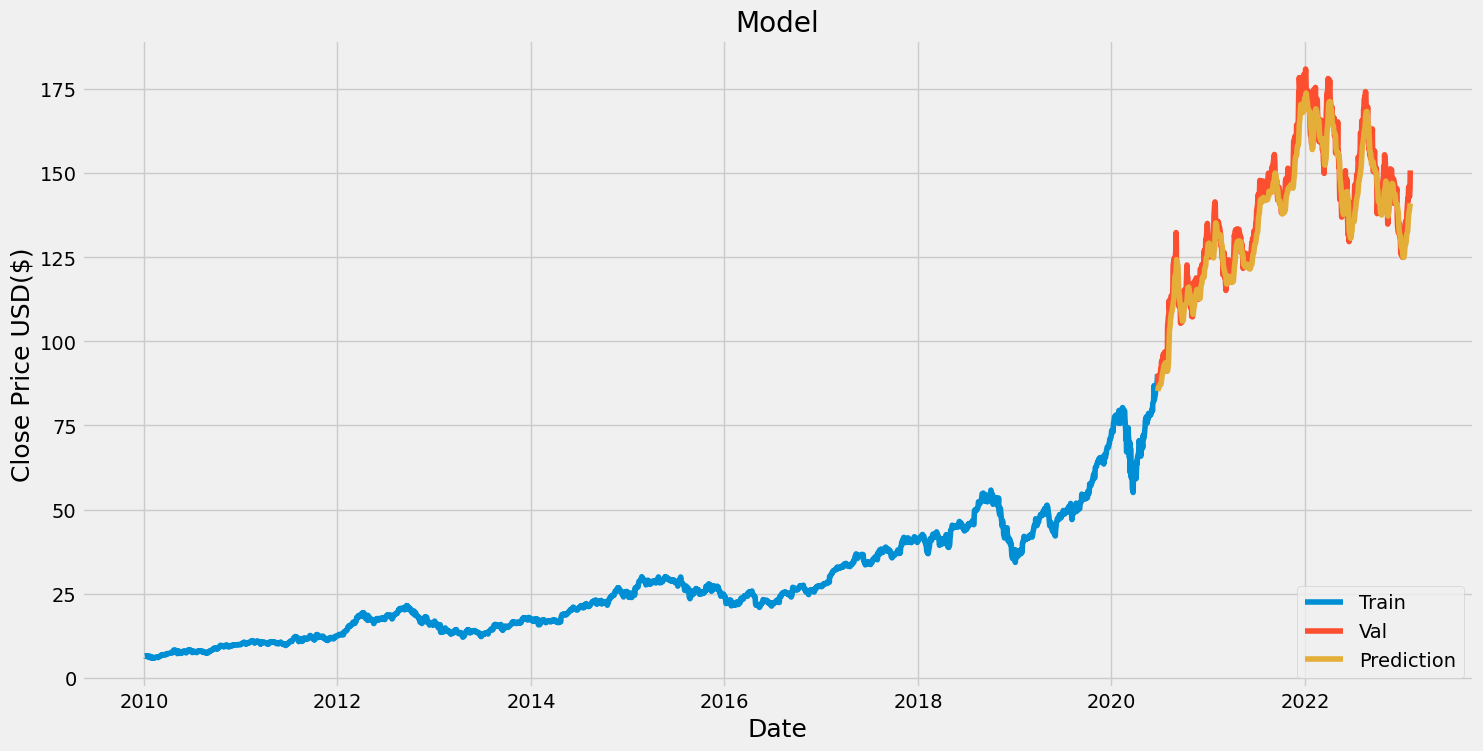

In [21]:
#Plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Prediction']=predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Train','Val','Prediction'],loc='lower right')
plt.show()

In [22]:
#Show the valid and predicted prices
valid

,Close,Prediction
Date,,
2020-06-24 00:00:00-04:00,88.634239,85.214684
2020-06-25 00:00:00-04:00,89.810913,85.802246
2020-06-26 00:00:00-04:00,87.051407,86.379189
2020-06-29 00:00:00-04:00,89.057648,86.466698
2020-06-30 00:00:00-04:00,89.801048,86.612404
...,...,...
2023-01-27 00:00:00-05:00,145.929993,137.789062
2023-01-30 00:00:00-05:00,143.000000,139.143158
2023-01-31 00:00:00-05:00,144.289993,139.886780


In [23]:
start = pd.to_datetime(['2007-01-01']).astype(int)[0]//10**9 # convert to unix timestamp.
end = pd.to_datetime(['2023-02-02']).astype(int)[0]//10**9 # convert to unix timestamp.
stock_ticker='AAPL'
url = 'https://query1.finance.yahoo.com/v7/finance/download/' + stock_ticker + '?period1=' + str(start) + '&period2=' + str(end) + '&interval=1d&events=history'
#Get the quote
apple_quote=aapl.history(start="2010-01-01",  end="2023-02-03")
#Create a new data frame
new_df=apple_quote.filter(['Close'])
#Get the last 60 day closing price value and convert dataframe to an array
last_60_days=new_df[-60:].values
#Scale the data
last_60_days_scaled=scaler.transform(last_60_days)
#create an empty list
X_test=[]
#Append the past 60 days
X_test.append(last_60_days_scaled)
#convert the x_test data set to numpy array
X_test=np.array(X_test)
#Reshape the data
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#Get the predicted scale price
pred_price=model.predict(X_test)
#Undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 44ms/step
[[142.27856]]


In [24]:
x_train.shape[1]

60